In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Cargar el set de datos
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
x= dataset.iloc[:,[2,3]].values # X es la variable independiente correspond a la edad y el salario
y= dataset.iloc[:,4].values # y es la variable dependiente y corresponde a la columna de compro o no compro

In [8]:
# Dividir los datos en entrenamiento y datos de prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=0)
# random_state=0 no cambie los datos cada vez que se ejecute
# 25 % seran para prueba
# 75 % seran para entrenar al algoritmo

In [11]:
# escalacion de datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Solo vamos a escalar los dato de x en el caso de la columna y esta en 0/1
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [15]:
#Crear el modelo de regresion logística
from sklearn.linear_model import LogisticRegression
clasificador = LogisticRegression(random_state=0)
clasificador.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [17]:
# usamos los datos de pruebas
y_pred = clasificador.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)

In [19]:
cm

array([[63,  5],
       [ 8, 24]], dtype=int64)

confusion matriz, observamos dos clases 0/1   
Hay 63 registros que debian ser clase 0 y los predijo correctamente    
pero hay 5 registros que deberian de ser clase 0 y los predijo como 1 es son incorrectos    

Hay 24 registros que deberian de ser clase 1 y los predijo correctamente    
Hay 8 registros que berian de ser clase 1 y los predijo como clase 0 es decir son incorrectos    

clase 0= personas que no compraron   
clase 1= personas que si compraron

In [20]:
score = clasificador.score(x_test,y_test)
score

0.87

# 0.87 es equivalente al 87%
Para esta prediccion pues tuvimos este porcetaje 

In [23]:
#Arboles de decisión
# Entropia es un sinonimo de insertidumbre
# usamos este esquema para disminuir la entropia y aumentar la probabilidad
from sklearn.tree import DecisionTreeClassifier
clasificador2 = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
clasificador2.fit(x_train, y_train) # entrenamos al modelo


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [24]:
y_pred_tree = clasificador2.predict(x_test)# predecir

In [29]:
cm2 = confusion_matrix(y_test,y_pred_tree) # Crear matrix

In [26]:
cm2

array([[61,  7],
       [ 3, 29]], dtype=int64)

In [28]:
score2= clasificador2.score(x_test,y_test)
score2

0.9

  El porcentaje de acierto de arboles de desicion 90%

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


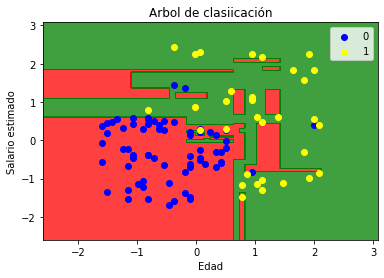

In [35]:
#Visualización de los resultados de prueba
from matplotlib.colors import ListedColormap
X_set, y_set= x_test, y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop = X_set[:,0].max()+1, step=0.01),
                    np.arange(start=X_set[:,0].min() -1, stop = X_set[:,0].max()+1, step=0.01))
plt.contourf(X1,X2, clasificador2.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())   

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j , 1],
    c=ListedColormap(('blue','yellow'))(i), label=j)
            
plt.title("Arbol de clasificación")
plt.xlabel("Edad")
plt.ylabel("Salario estimado")
plt.legend()
plt.show()